**Images to be plotted:**
- Adversarial digital watermark illustration (what is ADW?)
- Watermark extraction effect comparation (drawback of pipeline method)
- ADW Framework (how it work?)
- Attack and extraction result (how good it works, 5-6figs, original res and attacked res, extracted wm)

In [1]:
import sys
sys.path.append('../wm_attack/')
sys.path.append('../watermark/')
sys.path.append('../attacks/')
sys.path.append('../models/')
from atk_utils import *
from dct_wm import *
from fgsm import *
from ifgsm import *
from utils import *

In [2]:
from torchvision import transforms
import torch

In [3]:
alpha = 0.1
block_size = 8

In [4]:
model = get_model('resnet50')
T = transforms.ToTensor()
img = cv2.imread('../img/beagle.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = addborder(T(img),block_size).cuda()
wm = cv2.imread('../img/logo.jpg')
wm = cv2.cvtColor(wm,cv2.COLOR_BGR2RGB)
wm = transforms.Resize(img.size()[-2:])(T(wm)).cuda()

In [5]:
img_wm = embed_wm(img,wm,alpha,block_size)
wm_extract = extract_wm(img,img_wm,alpha,block_size)

24.451992430878178
0.9995793104171753


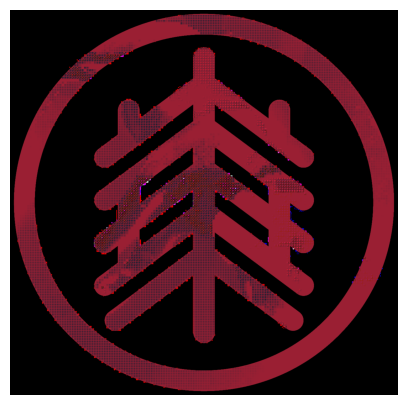

In [6]:
print(psnr(wm,wm_extract))
print(ssim(wm,wm_extract))
pltshow(wm_extract)
saveTensor(wm_extract,'wm_em_ex.jpg')

20.806821925992615
0.9994769096374512


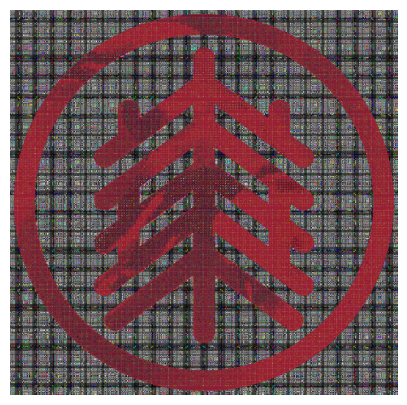

In [7]:
beta = 10 /255
steps = 10
eps = 5/255
atk_method = get_attack_method('ifgsm')
pred_label = model(img.unsqueeze(0)).argmax().item()
label = torch.tensor([pred_label]).cuda()
perd_img = atk_method(img,label,wm,model,alpha,beta,block_size,eps=eps,steps = steps)
wm_extracted_pipeline = extract_wm(img,perd_img,alpha,block_size)
pltshow(wm_extracted_pipeline)
print(psnr(wm,wm_extracted_pipeline))
print(ssim(wm,wm_extracted_pipeline))

In [8]:
saveTensor(wm_extracted_pipeline,'wm_extracted_pipeline.jpg')

In [9]:
pred,prob = check_predict(model,perd_img)
print(pred)
print(prob)

171
0.9848915338516235


21.763877934221583
0.9994795322418213


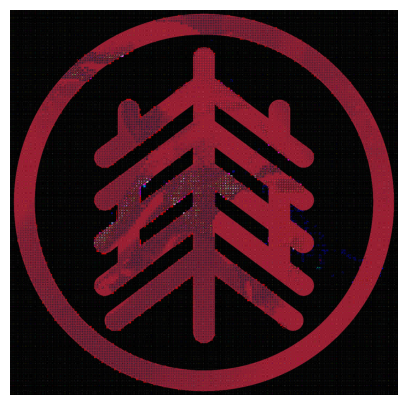

In [10]:
N = 20
beta_max = 10/255
l1 = 0.1
l2 = 0.5
s_a = 0.1
s_b = 0.1
atk_method = get_attack_method('ifgsm_opt')
perd_img,wm_extracted_optimize,a_res,b_res = \
                atk_method(img,label,wm,model,alpha,beta,block_size,N=N,l1=l1,l2=l2,s_a=s_a,s_b=s_b,beta_max=beta_max,steps=steps,eps=eps)
pltshow(wm_extracted_optimize)
print(psnr(wm,wm_extracted_optimize))
print(ssim(wm,wm_extracted_optimize))

In [11]:
saveTensor(wm_extracted_optimize,'wm_extracted_optimize.jpg')